<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li><b>2. Use the "titanic" dataset from the seaborn datasets
(sns.load_dataset('titanic')).</b> Find out the features of a typical person
that survived or did not survive the sinking of Titanic.</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/titanic.png"/>

<Axes: >

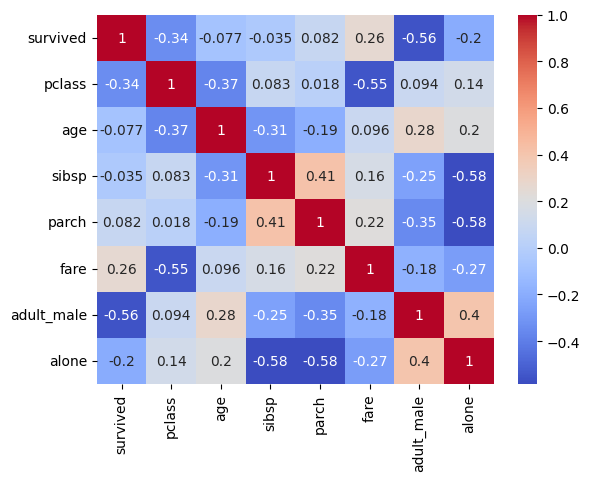

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_titanic = sns.load_dataset('titanic')

corr_titanic = df_titanic.corr(numeric_only=True)
sns.heatmap(corr_titanic, cmap='coolwarm', annot=True)

<p style="color: lightgreen;">From the heatmap, we see that the only positive correllations with survival are 'fare' (price for ticket) and 'parch' (number of parents/children aboard). You were more likely to survive if you paid for an expensive ticket or if you had your family aboard.</p><p style="color: lightgreen;"> The highest negative correllation is for adult males, meaning that they were the most likely to die. There is also a high negative correllation with 'pclass' and 'alone'. People in the lower classes were more likely to die because the lower classes have a higher value (1 = 1st class, 2 = 2nd class, 3 = 3rd class). People who were travelling alone were also more likely to die.</p>


<li><b>3. Use the "taxis" dataset from the seaborn datasets
(sns.load_dataset('taxis')).</b> Find out any correlations or interesting
behaviors based on any columns in the data (color, payment,
pickup_borough, dropoff_borough etc.)
<br /><br />

<b>Notes and ideas to try out:</b><br />
Consider removing the pickup_zone and dropoff_zone, since there are
way too many alternatives. Borough is the larger area in question, which
can be helpful while grouping data (hue!)<br /><br />
How about pickup and dropoff times, should they be modified? From
taxi point of view, is the weekday and time of day (morning, day,
evening, night) more interesting than the actual dates?
<br /><br />
These are just ideas, you're free to come up with your own ideas
regarding the data!</li>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/taxis.png"/>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_taxis = sns.load_dataset('taxis')
df_taxis.to_csv('taxis_data.csv', index=False)
# remove pickup and dropoff zones
df_taxis = df_taxis.drop(columns=['pickup_zone', 'dropoff_zone'])
# remove trips with distance 0
df_taxis = df_taxis[df_taxis['distance'] > 0]

df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan


In [149]:
# get date from datetime
def get_date(dt):
    return dt.date()

# get weekday from datetime
def get_weekday(dt):
    return dt.weekday()

# convert datetime to time of day
def time_of_day(dt):
    if dt.hour < 6:
        return 'night'
    elif dt.hour < 12:
        return 'morning'
    elif dt.hour < 18:
        return 'afternoon'
    else:
        return 'evening'
    
# apply get_date and get_weekday to pickup 
df_taxis['date'] = df_taxis['pickup'].apply(get_date)
df_taxis['weekday'] = df_taxis['pickup'].apply(get_weekday)

# apply time_of_day to pickup and remove pickup and dropoff times
df_taxis['time_of_day'] = df_taxis['pickup'].apply(time_of_day)
df_taxis = df_taxis.drop(columns=['pickup', 'dropoff'])
df_taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,date,weekday,time_of_day
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan,2019-03-23,5,evening
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan,2019-03-04,0,afternoon
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan,2019-03-27,2,afternoon
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan,2019-03-10,6,night
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan,2019-03-30,5,afternoon


(0.0, 10.0)

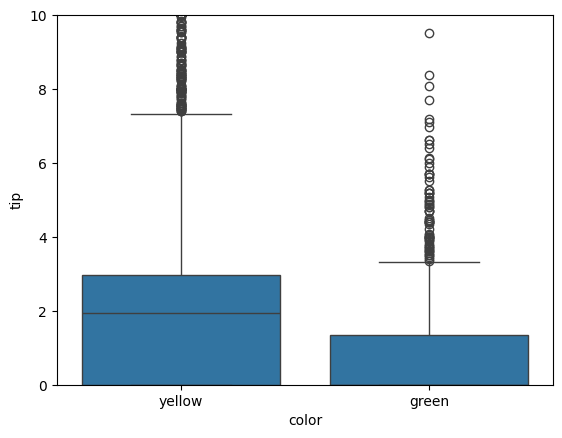

In [150]:
sns.boxplot(x='color', y='tip', data=df_taxis)
plt.ylim(0, 10)

<p style="color: lightgreen;">Yellow taxis get more tip.</p>

<Axes: xlabel='time_of_day', ylabel='count'>

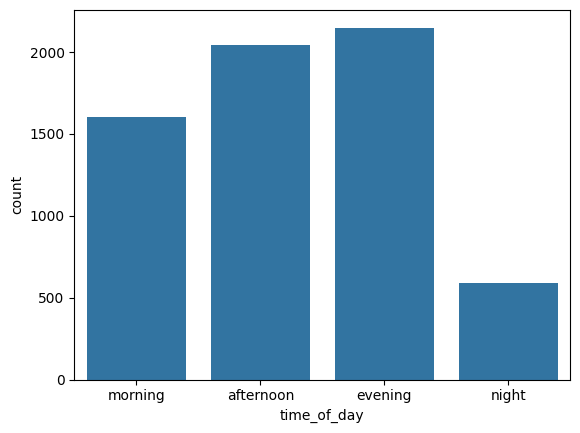

In [151]:
sns.countplot(x='time_of_day', data=df_taxis, order=['morning', 'afternoon', 'evening', 'night'])

<p style="color: lightgreen;">Most taxirides happen in the evening and the afternoon</p>

<Axes: xlabel='weekday', ylabel='count'>

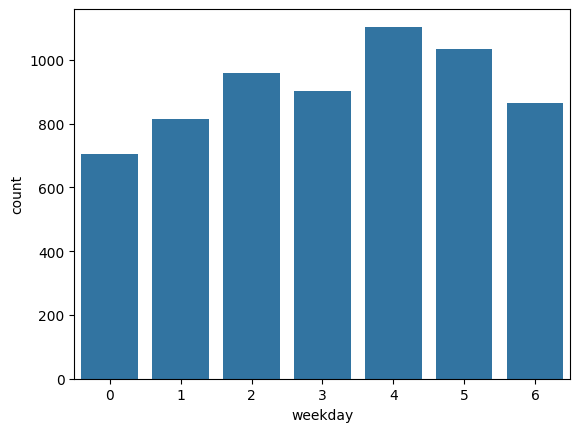

In [152]:
sns.countplot(x='weekday', data=df_taxis)

<p style="color: lightgreen;">Fridays are the busiest. Mondays are the least busy.</p>

(0.0, 20.0)

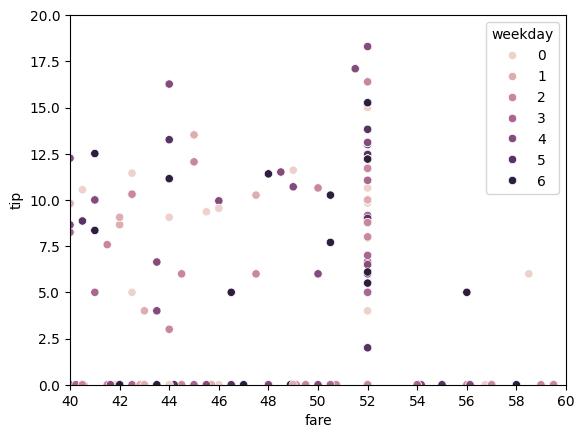

In [153]:
sns.scatterplot(x='fare', y='tip', data=df_taxis, hue='weekday', )
plt.xticks(range(0, int(df_taxis['fare'].max()) + 1, 2))

plt.xlim(40, 60)
plt.ylim(0, 20)

<p style="color: lightgreen;">It looks like $52 is a fixed fare. It's a ride from JFK to Manhattan.</p>

<a href="https://www.reddit.com/r/AskNYC/comments/1072hqb/jfk_to_manhattan_yellow_taxi_flat_rate_up_to_70/">reddit post</a>

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />

<ul>
<li><b>5. Try out any of the datasets below, or find yourself an interesting csvdataset from kaggle.com!  </b><br>

Use all your skills in numpy, pandas and seaborn, and find out features in
the data. <br ><br />
<b>Was there something that is surprising in the dataset? What
interesting correlations did you find?</b>
<br><br>
<b>Some interesting datasets, examples (you can find you own too!):</b>
</li>
<ul>
<li><a href="https://www.kaggle.com/anamvillalpando/world-happiness-ranking">https://www.kaggle.com/anamvillalpando/world-happiness-ranking</a></li>
<li><a href="https://www.kaggle.com/sakshigoyal7/credit-card-customers">https://www.kaggle.com/sakshigoyal7/credit-card-customers</a></li>
<li><a href="https://www.kaggle.com/lucabasa/dutch-energy">https://www.kaggle.com/lucabasa/dutch-energy</a></li>
<li><a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv">https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv</a></li>
<li><a href="https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv">https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv</a></li>
<li><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv">https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv</a><br /><br /></li>
</ul>
<li><b>Note:</b> These datasets can be quite rough to handle at first, feel free to
ask tips from your instructor if some dataset interests you!</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />